In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import datetime as dt
from datetime import datetime
df_migration_pre = pd.read_csv("dataset_migration.csv")
df_hdi_pre = pd.read_csv("HDI_Index.csv")

In [2]:
def dateto_ordinal(df,date_column):
    #Función para convertir fecha a tipo ordinal
    df['Fecha_Numerico']=df[date_column].map(dt.datetime.toordinal)
    return df

def country_code_num(df):
    #Funcion para crear diccionario codigo pais y "label_encoder"
    country_code = df["Country Code"].unique()
    country_code = country_code.tolist()
    country_code_c = {}
    keys = country_code
    values = range(1, len(keys)+1)
    for key, value in zip(keys, values):
        country_code_c[key] = value
    #Add new column Country_code_num
    df["country_code_c"] = df["Country Code"].map(country_code_c)
    #Funcion para crear diccionario id pais y "label_encoder"
    num_country_code = {v: k for k, v in country_code_c.items()}
    return df

def clearna (df):
    #Funcion para eliminar registros nulos
    df.dropna(inplace=True)
    return df

def dropcolumns_for_ml(df):
    #Funcion para dejar columnas de tipo float para el modelo de ml
    df = df.drop(["Country Code","Year","Unemployment Advanced Education (%)","Unemployment Intermediate Education (%)", "Unemployment Basic Education (%)","Labor Taxes and Contributions (%)","Social Protection and Labor Programs (%)","Poverty Rate (%)"],axis=1)
    return df

def dropcolumns(df):
    #Funcion para eliminar columnas
    df = df.drop(["Unemployment Advanced Education (%)","Unemployment Intermediate Education (%)", "Unemployment Basic Education (%)","Labor Taxes and Contributions (%)","Social Protection and Labor Programs (%)","Poverty Rate (%)"],axis=1)
    return df

def preprodata(df_migration,df_hdi):
    #Funcion para preprocesamiento de datos
    #unir dataframes
    df = df_migration.merge(df_hdi, how="left", on=["Country Name", "Country Code", "Year"])
    #eliminar columnas redundanes o que no tienen importancia en el modelo
    df.drop(["Unnamed: 0_x","Unnamed: 0_y"], axis= 1, inplace=True)
    df.drop("PIB Growth (%)", axis= 1, inplace=True)
    #Convertir year as date
    df["Year"] = pd.to_datetime(df["Year"].astype(str),format= "%Y")
    df= dateto_ordinal(df,"Year")
    df = country_code_num(df)
    df_ml = df
    df = dropcolumns(df)
    df = clearna(df)
    df_ml = dropcolumns_for_ml(df_ml)
    df_ml = clearna(df_ml)
    return df_ml , df

def country_reduce(df,list_country):
    mask = df["Country Name"].isin(list_country)
    df_filtered = df[mask]
    return df_filtered

#Función para convertir año a número ordinal
def convert_year_to_ordinal(year_input):
    year_num = datetime.strptime(year_input,'%Y').toordinal()
    return year_num

def year_filter(df,year_str):
    year_num = convert_year_to_ordinal(year_str)
    mask = df["Fecha_Numerico"] == year_num 
    df_filtered = df[mask]
    return df_filtered

In [3]:
#Lista de paises para el modelo ML paises receptores y emisores en conjunto
country_list =['Afganistán','Francia','China','Canadá','India','España',
                'México','Alemania','Venezuela','Italia','Pakistán','Estados Unidos',
               'Ucrania','Arabia Saudita','Bangladesh','Australia','República Árabe Siria',	
               'Reino Unido','Yemen, Rep. del','Federación de Rusia']

#Ejecución función de preprocesamiento
dfm_total_ml, dfm_total = preprodata(df_migration_pre,df_hdi_pre)
dfm_ml = country_reduce(dfm_total_ml,country_list)
dfm_total = country_reduce(dfm_total,country_list)

In [4]:
print(dfm_ml["Country Name"].value_counts())
print(dfm_ml.info())
print(dfm_total.info())

Australia                21
Italia                   21
Estados Unidos           21
Ucrania                  21
República Árabe Siria    21
Arabia Saudita           21
Federación de Rusia      21
Pakistán                 21
Bangladesh               21
México                   21
India                    21
Reino Unido              21
Francia                  21
España                   21
Alemania                 21
China                    21
Canadá                   21
Yemen, Rep. del          19
Afganistán               19
Venezuela                15
Name: Country Name, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 10 to 4543
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             410 non-null    object 
 1   Net Migration            410 non-null    float64
 2   PIB per Capita           410 non-null    float64
 3   Total Unemployment (%)   4

In [5]:
print(dfm_ml.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 10 to 4543
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             410 non-null    object 
 1   Net Migration            410 non-null    float64
 2   PIB per Capita           410 non-null    float64
 3   Total Unemployment (%)   410 non-null    float64
 4   human_development_index  410 non-null    float64
 5   Fecha_Numerico           410 non-null    int64  
 6   country_code_c           410 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 25.6+ KB
None


[[6.36533321e-01 1.92728025e-02 2.28882840e-01 9.11262799e-01
  4.24528302e-02]
 [4.94867360e-01 2.31628712e-03 1.11716620e-01 2.09897611e-01
  7.54716981e-02]
 [6.61000131e-01 3.46594450e-02 2.50291938e-01 9.01023891e-01
  1.46226415e-01]
 ...
 [6.79140030e-01 3.38004347e-04 3.83690148e-01 3.66894198e-01
  8.72641509e-01]
 [6.06945675e-01 7.14612692e-03 3.39898790e-01 7.04778157e-01
  9.43396226e-01]
 [7.86711553e-01 9.85007219e-01 2.97781243e-01 9.52218430e-01
  9.52830189e-01]]
[[-0.50535918  0.07069784 -0.07808376 -0.08470844 -0.02754675]
 [-0.26946712 -0.56217959  0.18071474 -0.03072102 -0.05945055]
 [-0.40301415  0.10283155 -0.08194773 -0.06084598 -0.03626964]
 ...
 [ 0.45087    -0.15963336 -0.07383951  0.11414408 -0.09612182]
 [ 0.41980243  0.12154769 -0.15771631 -0.05093909  0.01356915]
 [ 0.35315887  0.73439608  0.53990649  0.3162864   0.23731236]]
[[-0.01911631  0.00138839  0.02921069 -0.29239431  0.95565943]
 [ 0.31705918  0.35403744  0.01427512  0.83971426  0.26231117]
 [ 0

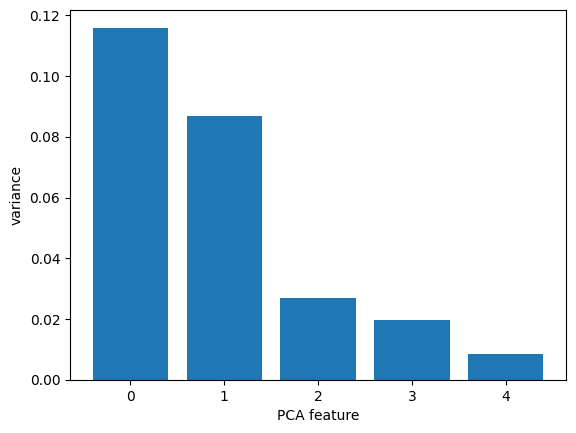

[[-0.50535918  0.07069784 -0.07808376 -0.08470844 -0.02754675]
 [-0.26946712 -0.56217959  0.18071474 -0.03072102 -0.05945055]
 [-0.40301415  0.10283155 -0.08194773 -0.06084598 -0.03626964]
 ...
 [ 0.45087    -0.15963336 -0.07383951  0.11414408 -0.09612182]
 [ 0.41980243  0.12154769 -0.15771631 -0.05093909  0.01356915]
 [ 0.35315887  0.73439608  0.53990649  0.3162864   0.23731236]]


In [16]:
#Función para ejecutar modelo no supervisado

def func_scaler(df):
    X_in = df.drop(["Fecha_Numerico","Country Name"],axis=1).values
    #Escalar X
    #Escalado de todos los features Min_Max scaler
    # Import MinMaxScaler
    from sklearn.preprocessing import MinMaxScaler
    # Instantiate MinMaxScaler
    MM_scaler = MinMaxScaler()
    # Fit MM_scaler to the data
    MM_scaler.fit(X_in)
    #Escalado de todos los features Min_Max scaler
    X = MM_scaler.transform(X_in)
    return X

def func_PCA(X_in):
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    model=PCA()
    model.fit(X_in)
    X_transformed = model.transform(X_in)
    print(X_transformed)
    print(model.components_)
    features = range(model.n_components_)
    print(features)
    plt.bar(features, model.explained_variance_)
    plt.xticks(features)
    plt.ylabel('variance')
    plt.xlabel('PCA feature')
    plt.show()
    return model, X_transformed

X = func_scaler(dfm_ml)
print(X)
pca, X_new = func_PCA(X)
print(X_new)
